<a href="https://colab.research.google.com/github/quant-IT/Clarusway/blob/main/El_Yazisi_Rakam_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
#Gerekli kütüphanelerin eklenmesi
import tensorflow
from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from google.colab import files
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import HTML

In [97]:
# MNIST veri setinin yüklenmesi
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

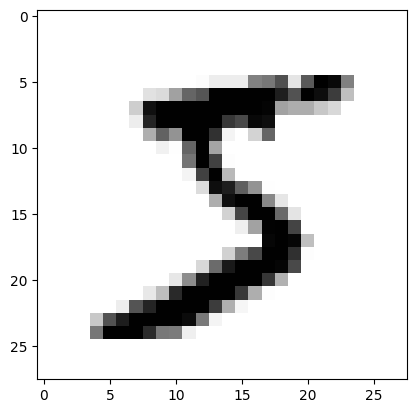

In [98]:
#Eğitim setinin ilk rakamının görüntüsü
plt.imshow(train_images[0], cmap='gray_r')
plt.show()

In [99]:
#Üstteki verinin piksellerinin ASCII olarak kodlanmış hali (Beyaz:0 - Siyah: 255)
for row in train_images[0]:
    for i in row:
        print("%3s "%i, end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [100]:
# Verilerin ön işlenmesi
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [101]:
# Etiketlerin one-hot encoding yapılması
train_labels = tensorflow.keras.utils.to_categorical(train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(test_labels, 10)

In [102]:
# Modelin oluşturulması
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [103]:
# Modelin derlenmesi
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [104]:
# Modelin eğitilmesi
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 46s 60ms/step - loss: 0.1943 - accuracy: 0.9408 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 3/5
750/750 [==============================] - 42s 57ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0418 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 5/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0388 - val_accuracy: 0.9891


In [108]:
#Tahmin edilecek rakam görselinin seçilmesi
uploaded = files.upload()


Saving 4.jpg to 4 (2).jpg


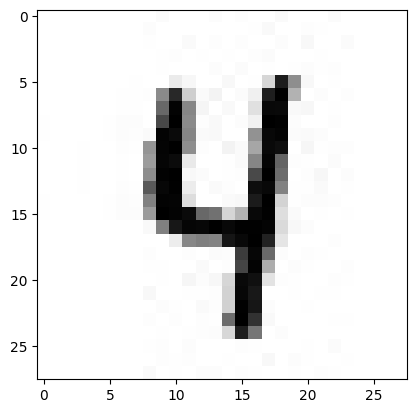

1/1 [==============================] - 0s 35ms/step


In [109]:
# Seçilen dosya adını kullanarak görüntünün açılması
for fn in uploaded.keys():
  img_path = fn
  img = load_img(img_path, target_size=(28, 28), color_mode='grayscale')
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
# Görüntüyü göster
  plt.imshow(img_tensor[0, :, :, 0], cmap='gray')
  plt.show()
  predictions = model.predict(img_tensor)

# Değişkenler
  renk1 = "blue"
  renk2 = "red"
  font_boyutu1 = "40px"
  font_boyutu2 = "40px"
  metin1 = "Tahmin: "
  metin2 = np.argmax(predictions)

# HTML çıktısını formatla ve göster
  html_metin = "<p><span style='color: {}; font-size: {};'>{}</span> <span style='color: {}; font-size: {};'>{}</span></p>".format(renk1, font_boyutu1, metin1, renk2, font_boyutu2, metin2)
  display(HTML(html_metin))


313/313 [==============================] - 3s 9ms/step


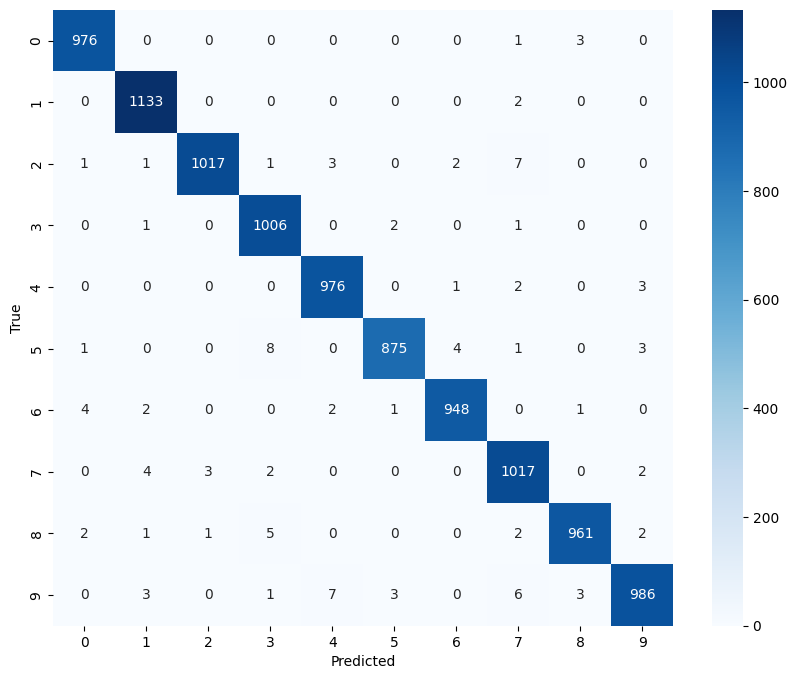

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test seti üzerinde tahmin yapın
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion matrix hesaplayın
cm = confusion_matrix(y_true, y_pred_classes)

# Confusion matrix'i görselleştirin
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [111]:
# Her bir rakam için doğru tahmin sayısını hesapla ve yazdır
top=0
cor_top=0
for digit in range(10):
    correct_predictions = np.sum((predicted_labels == digit) & (test_labels_single == digit))
    total_digit = np.sum(test_labels_single == digit)
    top = top + total_digit
    cor_top = cor_top + correct_predictions
    oran = 100*correct_predictions/total_digit
    cor_oran = 100*cor_top/top
    print(f"Model {total_digit} tane '{digit}' rakamından {correct_predictions} tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: {oran:.2f}")
print(f"Toplam test verisi sayısı:  {top} Doğru Tahmin edilen: {cor_top} Genel Doğru Tahmin Oranı %: {cor_oran:.2f}")

Model 980 tane '0' rakamından 977 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 99.69
Model 1135 tane '1' rakamından 1132 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 99.74
Model 1032 tane '2' rakamından 1027 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 99.52
Model 1010 tane '3' rakamından 1006 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 99.60
Model 982 tane '4' rakamından 944 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 96.13
Model 892 tane '5' rakamından 879 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 98.54
Model 958 tane '6' rakamından 945 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 98.64
Model 1028 tane '7' rakamından 1002 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 97.47
Model 974 tane '8' rakamından 969 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 99.49
Model 1009 tane '9' rakamından 978 tanesini doğru tahmin etti. Doğru Tahmin etme oranı %: 96.93
Toplam test verisi sayısı:  10000 Doğru T